# TP4

## Constantes et modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

## FTCS et l’équation d’onde

### Question 3

On veut caractériser les oscillations d'une corde de piano de longueur $L$ fixée aux deux bouts. La corde est frappée par un marteau à une distance $d$ d'une de ses extrémités. La situation est représentée à la figure $\textcolor{red}{\text{N}}$.

<center><img src="Q3_schéma.JPG" style="width: 600px;"/></center>
<center>Figure N. AJOUTER LE TITRE ET LA REF AUX CONSIGNES

$$\textcolor{red}{\text{AJOUTER LA REF ET LE TITER ET LE NO DE FIGURE}}$$

On sait que le comportement de la corde tendue respecte l'équation d'onde en une dimension. L'équation d'onde à une dimension correspond à :
$$\frac{\partial^2\phi}{\partial t^2} = v^2\frac{\partial^2\phi}{\partial x^2}$$
On doit adapter cette équation afin de pouvoir la résoudre numériquement. Pour ce faire, on divise la corde en $N$ petits intervalles de longueur $a$. La dérivée par rapport à $x$ peut alors être approximée par une forme discrète :
$$\frac{\partial^2\phi}{\partial x^2} = \frac{1}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
En remplaçant dans l'équation d'onde, on obtient l'équation différentielle totale suivante :
$$\frac{\partial^2\phi}{\partial t^2} = \frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
On veut maintenant convertir l'équation différentielle d'ordre 2 en un système de 2 équations différentielles d'ordre 1. En posant le changement de variable $\psi(x,t) = \frac{\text{d}\phi}{\text{d}t}$, on obtient le système d'équations suivant :
$$\psi(x,t) = \frac{\text{d}\phi}{\text{d}t}$$
$$\frac{\text{d}\psi}{\text{d}t} = \frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
En utilisant la méthode d'Euler avec un pas temporel $h$, on obtient les équations FTCS suivantes :
$$\phi(x,t+h) = \phi(x, t) + h\psi(x, t)$$
$$\psi(x, t+h) = \psi(x, t) + h\frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
On peut maintenant déterminer numériquement le comportement de la corde pour les conditions initiales données dans l'énoncé.  On a donc une corde de longueur $L=1$ m, de diamètre $d=10$ cm, avec $v=100\ \text{ms}^{-1}$. Initialement, on a $\phi(x)=0$ et
$$\psi(x) = C\frac{x(L-x)}{L^2}e^{-\frac{(x-d)^2}{2\sigma^2}}$$
où $C=1\ \text{ms}^{-1}$ et $\sigma = 0,3$ m.

On code la fonction *corde_FTCS*. Cette fonction prend en argument les *arrays* *phi_0* [m] et *psi_0* [m/s], qui correspondent respectivement aux conditions initiales $\phi(x)$ et $\psi(x)$, ainsi que la longueur *L* [m] de la corde, le nombre *N* de tranches spatiales, la valeur finale de temps *t_f* [s] qui nous intéresse, le nombre *N_t* de tranches temporelles et la valeur du paramètre *v* [$\text{s}^{-1}$]. La fonction détermine d'abord la valeur des pas temporel *h* et spatial *a* à partir des valeurs de *L*, *N*, *t_f* et *N_t*. La fonction utilise ensuite les équations FTCS déterminées plus haut afin de calculer de manière itérative les valeurs de $\phi$ et de $\psi$ pour chaque valeur de temps $t$. Elle retourne ensuite les valeurs de temps *t* dans un *array numpy* à une dimension et les valeurs de *phi* et de *psi* séparément dans deux *arrays numpy* à 2 dimensions où chaque ligne représente un incrément de temps.

In [2]:
# Méthode FTCS pour déterminer le comportement de la corde
# Arguments:
# phi_0 : array 1D des valeurs initiales de phi [m]
# psi_0 : array 1D des valeurs initiales de psi [m/s]
# L : longueur de la corde [m]
# N : nombre de divisions en x [-]
# t_f : valeur maximale de temps [s]
# N_t : nombre de divisions en t [-]
# v : valeur du paramètre v [s^(-1)]
# Retourne :
# t : array numpy 1D représentant les valeurs de temps [s]
# phi : array numpy 2D des valeurs de phi ou chaque rangée est associée 
#       à une valeur de temps et chaque colonne à une position [m]
# psi : array numpy 2D des valeurs de psi ou chaque rangée est associée 
#       à une valeur de temps et chaque colonne à une position [m/s]

def corde_FTCS(phi_0, psi_0, L, N, t_f, N_t, v):
    # pas temporel et spatial
    h = t_f / N_t
    a = L / N
    
    # variables indépendantes
    t = np.linspace(0, t_f, N_t)
    x = np.linspace(0, L, N)

    # valeurs initiales en listes
    phi = [list(phi_0)]
    psi = [list(psi_0)]

    # processus itératif en listes (zéro au début et à la fin pour les bouts fixes)
    for i in range(len(t)):
        psi_i = [0]
        phi_i = [0]
        for j in range(len(x))[1:-1]:
            phi_j = phi[i][j] + h*psi[i][j]
            psi_j = psi[i][j] + h*v**2/a**2 * (phi[i][j+1] + phi[i][j-1] - 2*phi[i][j])
            phi_i.append(phi_j)
            psi_i.append(psi_j)
        phi_i.append(0)
        psi_i.append(0)
        phi.append(phi_i)
        psi.append(psi_i)
    
    # conversion en array
    return t, np.array(phi), np.array(psi)

On peut maintenant déterminer le comportement de la corde de $t=0$ à $t=100$ ms pour les valeurs de paramètres et les valeurs initiales données.

In [3]:
# données
L = 1
N = 100
t_f = 0.1
h = 10**(-6)
N_t = int(t_f / h)
C = 1
d = 0.1
sigma = 0.3
v = 100

# conditions initiales
init_phi = np.zeros(N)
x = np.linspace(0, L, N)
init_psi = C*x*(L-x) / L**2 * np.exp(-(x-d)**2 / (2*sigma**2))

t, phi, psi = corde_FTCS(init_phi, init_psi, L, N, t_f, N_t, v)

On représente graphiquement la position de la corde au temps $t=100$ ms.

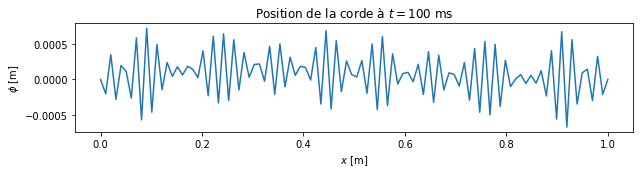

In [4]:
# représentation graphique à t=0.1
fig1 = plt.figure(figsize=(10, 2))
fig1.patch.set_facecolor('white')
plt.xlabel('$x$ [m]')
plt.ylabel('$\phi$ [m]')
plt.plot(x, phi[-1])
plt.title("Position de la corde à $t=100$ ms")
plt.show()

Ce résultat, qui ne correspond pas à ce à quoi on s'attend physiquement, semble indiquer que la solution donnée par la méthode FTCS s'éloigne de la solution physique lorsque le temps avance. On pourra mieux observer ce comportement à la question 4 grâce à une animation.

### Question 4

On veut maintenant observer le comportement de la corde dans l'intervalle de temps. Pour ce faire, on veut représenter les résultats obtenus à la question 3 dans une animation. Pour ce faire, on utilise la fonction *FuncAnimation* du module *matplotlib.animation*. Afin d'avoir une animation et un temps de calcul tous deux d'une durée raisonnable, on choisit de tracer seulement 1 itération temporelle sur 100. On aura donc 1000 images à générer pour animer la corde de 0 à 100 ms. On sauvegarde l'animation et on la fait apparaître dans le *notebook*.

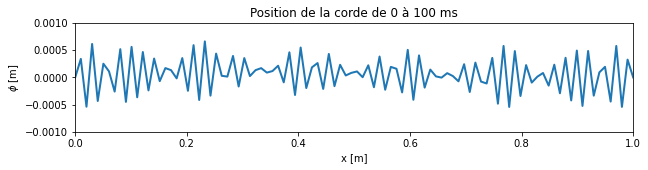

In [5]:
# création de la figure et la ligne qui contiendra les données
fig2 = plt.figure(figsize=(10,2))
fig2.patch.set_facecolor('white')
ax = plt.axes(xlim=(0, 1), ylim=(-0.001, 0.001))
line, = ax.plot([], [], lw=2)
plt.xlabel("x [m]")
plt.ylabel("$\phi$ [m]")
plt.title("Position de la corde de 0 à 100 ms")

# 1 frame pour 100 itérations temporelles
phi_anim = phi[::200]
psi_anim = psi[::200]

# fonction d'initialisation
def fonc_init():
    line.set_data([], [])
    return line,

# fonction d'animation
def anim(i):
    x = np.linspace(0, 1, 100)
    y = phi_anim[i]
    line.set_data(x, y)
    return line,

# animation
corde1 = FuncAnimation(fig2, anim, init_func=fonc_init, frames=500, interval=10, repeat=True)

# sauvegarde
writervideo = FFMpegWriter(fps=30)
corde1.save("corde1.mp4", writer=writervideo)

plt.show()

On remarque que le comportement de la corde suit initialement le comportement prévu physiquement. En effet, on observe une déformation qui part du point où le marteau frappe la corde et qui se propage le long de celle-ci en étant réfléchie aux extrémités. Puis, de petites oscillations non-physiques commencent à apparaître. Ces oscillations deviennent de plus en plus grandes jusqu'à ce qu'elles soient de taille comparable au mouvement du début de l'animation. On voit donc très bient que la méthode FTCS donne, dans ce cas-ci, une solution qui diverge de la vraie solution lorsque le temps avance.

### Question 5

Maintenant que nous avons observé le comportement de la corde tel que prédit par la méthode FTCS, on veut en analyser la stabilité. Pour ce faire, on peut utiliser la méthode de von Newmann. La démarche pour déterminer la stabilité de la méthode FTCS appliquée à l'équation d'onde est présentée en détails dans la section 9.3.2 de *Computational Physics - Revised and expanded* par Mark Newman. Tout d'abord, on représente nos 2 équations FTCS en séries de Fourier. On regroupe alors les coefficients de Fourier des deux équations en un vecteur pour chaque terme de la série. On peut maintenant représenter l'évolution du vecteur des coefficients de Fourier $\boldsymbol{c}(t)$ grâce à un opérateur linéaire $A$ de la façon suivante :
$$\boldsymbol{c}(t+h) = A\boldsymbol{c}(t)$$
On peut représenter le vecteur $\boldsymbol{c}(t)$ en fonction des vecteurs propres $v_i$ de l'opérateur $A$ :
$$\boldsymbol{c}(t) = \alpha_1v_1 + \alpha_2v_2$$
où $\alpha_1$ et $\alpha_2$ sont des constantes. On peut maintenant représenter l'équation d'une itération temporelle de la façon suivante :
$$\boldsymbol{c}(t+h) = \alpha_1\lambda_1v_1 + \alpha_2\lambda_2v_2$$
où $\lambda_i$ est la valeur propre de $A$ associée au vecteur propre $v_i$. On remarque donc que les vecteurs propres sont simplement multipliés par la même constante à chaque itération. On aura donc une solution qui ne diverge pas seulement si $|\lambda_1|,|\lambda_2|\leq 1$. Sinon, les vecteurs propres seront multipliés par une valeur plus grande que l'unité à chaque itération et les coefficients vont simplement augmenter jusqu'à tendre vers l'infini. Dans notre cas, les valeurs propres respectent l'expression suivante :
$$|\lambda| = \sqrt{1 + \frac{4h^2v^2}{a^2}\sin^2\frac{ka}{2}}$$
Comme cette expression est toujours plus grande que 1, on voit que la méthode FTCS diverge toujours lorsqu'on l'utilise pour résoudre l'équation d'onde. Ce résultat explique les instabilités observées aux question 3 et 4 qui apparaissent après un certain temps. Si on laissait la simulation continuer pour des valeurs de temps plus élevées, on obtiendrait des instabilités toujours de plus en plus grandes.

### Question 6

Vu l'échec de la méthode FTCS pour résoudre l'équation d'onde, on essaie maintenant la méthode de Crank-Nicolson. Pour l'équation d'onde à une dimension, les équations de la méthode de Crank-Nicolson correspondent à :
$$\phi(x,t+h) - \frac{1}{2}h\psi(x,t+h) = \phi(x,t) + \frac{1}{2}h\psi(x,t)$$
$$\psi(x,t+h) - h\frac{v^2}{2a^2}[\phi(x+a,t+h) + \phi(x-a,t+h) - 2\phi(x,t+h)] = \psi(x,t) + h\frac{v^2}{2a^2}[\phi(x+a,t) + \phi(x-a,t) - 2\phi(x,t)]$$
Comme les équations ne donnent pas explicitement $\phi$ et $\psi$, on doit les déterminer en résolvant le système d'équations linéaires formé par les équations.

On crée alors la méthode *corde_CN*, qui prend en argument les valeurs initiales *phi_0* et *psi_0* sous forme d'*arrays* 1D, la longueur *L* de la corde en mètres, le nombre *N* de divisions spatiales de la corde, la valeur maximale de temps *t_f* en secondes, le nombre *N_t* d'itérations temporelles et le paramètre *v* de l'équation différentielle en $\text{s}^{-1}$. En premier lieu, la fonction définit les pas temporel *h* et spatial *a*, crée les arrays 1D des variables de temps et d'espace et convertit les conditions initiales en listes. Ensuite, le processus itératif commence. Pour chaque itération temporelle, la fonction doit créer les matrices qui représentent le système d'équaitons linéaires des $2N-4$ équations de Crank-Nicolson (on a 2 équations par position $x$ excepté les deux bouts fixés en hauteur et en vitesse à 0). Pour ce faire, deux *array* sont créés à chaque itération. Le premier contient les coefficients des $\phi(x, t+h)$ et $\psi(x, t+h)$ des parties gauches des équations de Crank-Nicolson pour chaque valeur de $x$ qui n'est pas fixée à 0. Chaque ligne correspond à une équation différente et chaque colonne correspond à une hauteur ou à une vitesse pour une position donnée sur la corde. Les colonnes sont ordonnées de $x=0$ à $x=L$ d'abord pour $\phi(x,t+h)$ et ensuite pour $\psi(x, t+h)$. Les bouts fixés à 0 sont exclus de l'*array* avant de procéder à la résolution du système. L'autre *array* utilisé pour résoudre le système est simplement un array 1D des résultats de la partie de droite de chaque équation de Crank-Nicolson. Évidemment, la position de chaque résultat concorde avec la ligne de la même équation dans l'*array* des coefficients. La fonction crée donc, pour chaque itération temporelle et avec des *arrays* *numpy*, le système d'équation qui peut être vu sous forme matricielle de la façon suivante:

\begin{bmatrix}
1&0&\dots&0&-\frac{1}{2}h&0&\dots&0\\
h\frac{v^2}{2a^2}&-h\frac{v^2}{2a^2}&\dots&0&1&0&\dots&0\\
0&1&\dots&0&0&-\frac{1}{2}h&\dots&0\\
-h\frac{v^2}{2a^2}&h\frac{v^2}{2a^2}&\dots&0&0&1&\dots&0\\
\vdots\\
0&0&\dots&1&0&0&\dots&-\frac{1}{2}h\\
0&0&\dots&h\frac{v^2}{2a^2}&0&0&\dots&1\\
\end{bmatrix}\begin{bmatrix}\phi(a,t+h)\\\phi(2a,t+h)\\\vdots\\\phi(L-a,t+h)\\\psi(a,t+h)\\\psi(2a,t+h)\\\vdots\\\psi(L-a,t+h)\end{bmatrix}=\begin{bmatrix}C_1\\C_2\\\vdots\\C_{N-2}\\C_{N-1}\\C_{N}\\\vdots\\C_{2N-4}\\\end{bmatrix}

où les $C_n$ représentent les valeurs numériques des parties de droite des équations de Crank-Nicolson. La fonction résoud ensuite le système d'équations en utilisant *linalg.solve* de *numpy*, qui utilise la méthode de la décomposition LU. À la fin du processus itératif, les valeurs de $\phi$ et de $\psi$ sont retournées séparément dans deux *arrays* 2D où chaque colonne représente une position $x$ et chaque ligne représente un temps $t$. Les 0 des bouts fixes sont également réintroduits dans les *arrays* à la fin du processus.


In [6]:
# CRANK-NICOLSON
#
# Arguments:
# phi_0 : valeurs initiales de phi sous forme de liste [m]
# phi_0 : valeurs initiales de psi sous forme de liste [m/s]
# L : longueur de la corde [m]
# N : nombre de divisions spatiales [-]
# t_f : valeur maximale de temps [s]
# N_t : nombre d'itérations temporelles [-]
# v : paramètre v de l'équation d'onde [s^(-1)]
#
# Retourne:
# t : valeurs temporelles dans un array numpy 1D [s]
# phi : valeurs de phi dans un array numpy 2D [m]
# psi : valeurs de psi dans un array numpy 2D [m/s]

def corde_CN(phi_0, psi_0, L, N, t_f, N_t, v):
    # pas temporel et spatial
    h = t_f / N_t
    a = L / N
    
    # variables indépendantes
    t = np.linspace(0, t_f, N_t)
    x = np.linspace(0, L, N)

    # valeurs initiales en listes
    phi = [list(phi_0)]
    psi = [list(psi_0)]

    # constantes pour simplifier les calculs
    b = h * v**2 / (2*a**2)
    lenx = len(x)

    # processus iteratif
    for i in range(len(t)):
        coeffs = []
        somme = []

        for j in range(lenx)[1:-1]:

            # première équation de C-N
            coeffs_j_1 = [0 for n in range(2*lenx)]
            coeffs_j_1[j] = 1
            coeffs_j_1[lenx + j] = -1/2*h
            somme_j_1 = phi[i][j] + 1/2*h * psi[i][j]

            # bouts fixes
            del(coeffs_j_1[0], coeffs_j_1[lenx-2:lenx], coeffs_j_1[-1])

            coeffs.append(coeffs_j_1)
            somme.append(somme_j_1)

            # deuxième équation de C-N
            coeffs_j_2 = [0 for n in range(2*lenx)]
            coeffs_j_2[j-1] = -b
            coeffs_j_2[j] = 2*b
            coeffs_j_2[j+1] = -b
            coeffs_j_2[lenx + j] = 1
            somme_j_2 = psi[i][j] + b * (phi[i][j+1] + phi[i][j-1] - 2*phi[i][j])

            # bouts fixes
            del(coeffs_j_2[0], coeffs_j_2[lenx-2:lenx], coeffs_j_2[-1])

            coeffs.append(coeffs_j_2)
            somme.append(somme_j_2)

        # formattage pour la résolution
        coeffs_array = np.array(coeffs)
        somme_array = np.array(somme)

        # résolution du système d'équations
        result = np.linalg.solve(coeffs_array, somme_array)

        phi.append([0] + list(result[:lenx-2]) + [0])
        psi.append([0] + list(result[lenx-2:]) + [0])
    
    return t, phi, psi


On peut maintenant utiliser les mêmes données qu'auparavant pour déterminer le résultat donné par notre nouvelle fonction utilisant la méthode de Crank-Nicolson. Comme la méthode de Crank-Nicolson est un peut plus lourde que la méthode FTCS, on utilise un pas temporel $h=10^{-5}$, soit 10 fois plus grand que pour la méthode FTCS, afin de limiter le temps de calcul.

In [7]:
# données
L = 1
N = 100
t_f = 0.1
h = 10**(-5)
N_t = int(t_f / h)
C = 1
d = 0.1
sigma = 0.3
v = 100

# conditions initiales
init_phi = np.zeros(N)
x = np.linspace(0, L, N)
init_psi = C*x*(L-x) / L**2 * np.exp(-(x-d)**2 / (2*sigma**2))

t_CN, phi_CN, psi_CN = corde_CN(init_phi, init_psi, L, N, t_f, N_t, v)

On peut maintenant créer une animation du résultat en utilisant le même code que pour l'animation des résultats donnés par la méthode FTCS.

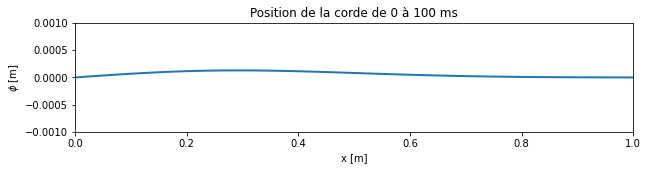

In [8]:
# création de la figure et la ligne qui contiendra les données
fig3 = plt.figure(figsize=(10,2))
fig3.patch.set_facecolor('white')
ax = plt.axes(xlim=(0, 1), ylim=(-0.001, 0.001))
line, = ax.plot([], [], lw=2)
plt.xlabel("x [m]")
plt.ylabel("$\phi$ [m]")
plt.title("Position de la corde de 0 à 100 ms")

# 1 frame pour 20 itérations temporelles
phi_anim_CN = phi_CN[::20]
psi_anim_CN = psi_CN[::20]

# fonction d'initialisation
def fonc_init():
    line.set_data([], [])
    return line,

# fonction d'animation
def anim(i):
    x = np.linspace(0, 1, 100)
    y = phi_anim_CN[i]
    line.set_data(x, y)
    return line,

# animation
corde2 = FuncAnimation(fig3, anim, init_func=fonc_init, frames=500, interval=10, repeat=True)

# sauvegarde
writervideo = FFMpegWriter(fps=30)
corde2.save("corde2.mp4", writer=writervideo)

plt.show()

On voit que les perturbations non-physiques qui apparaissaient dans les résultats donnés par la méthode FTCS ne sont pas présentes dans les résultats donnés par la méthode de Crank-Nicolson, même si nous avons utilisé un pas temporel 10 fois plus grand ici. Toutefois, on veut aussi s'assurer que la méthode ne diverge pas pour des valeurs de $t$ plus grandes. On veut donc prouver que la méthode de Crank-Nicolson converge pour l'équation d'onde.